In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import matplotlib
import os
from matplotlib.ticker import FormatStrFormatter

In [2]:
import gen_mandelbrot as gm


In [3]:
if not os.path.isdir("figures"):
            os.makedirs("figures")
plt.figure()
plt.close('all')
plt.rcParams["font.size"] = 22

## (Fractal) Images of the Mandelbrot set

In [4]:
cur_center = -0.8 + 0.0j
cur_extent = 3.0 + 3.0j

resolution = 256 * 4
# XY-quadrant that will be inspected
cur_width = resolution  # (x axis); real numbers
cur_height = resolution  # (y axis); imaginary

cur_max_iter = resolution  # convergence test search depth

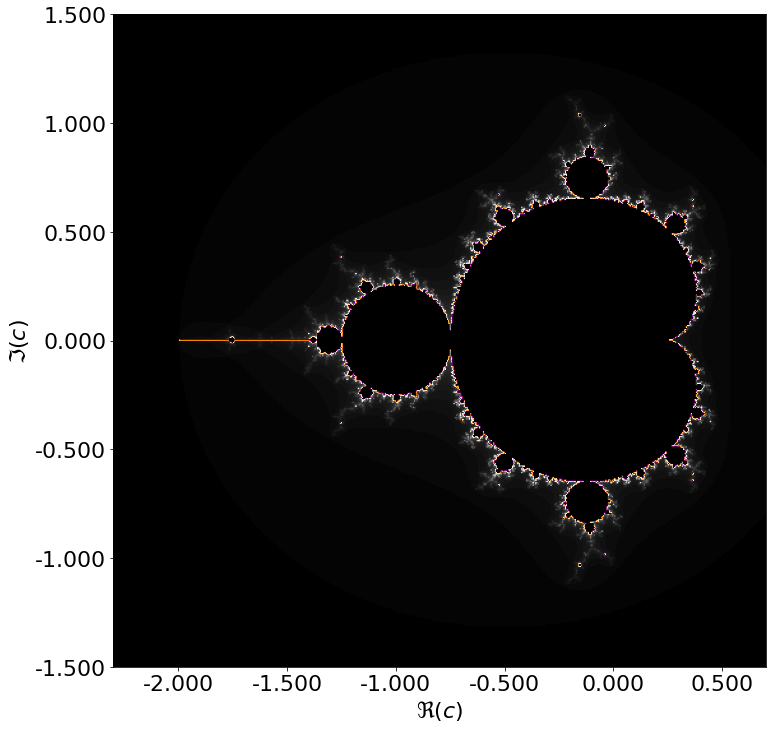

In [5]:
gm.draw_mandelbrot(cur_center, cur_extent,fname="mandelbrot_final",resolution=256*2**1)

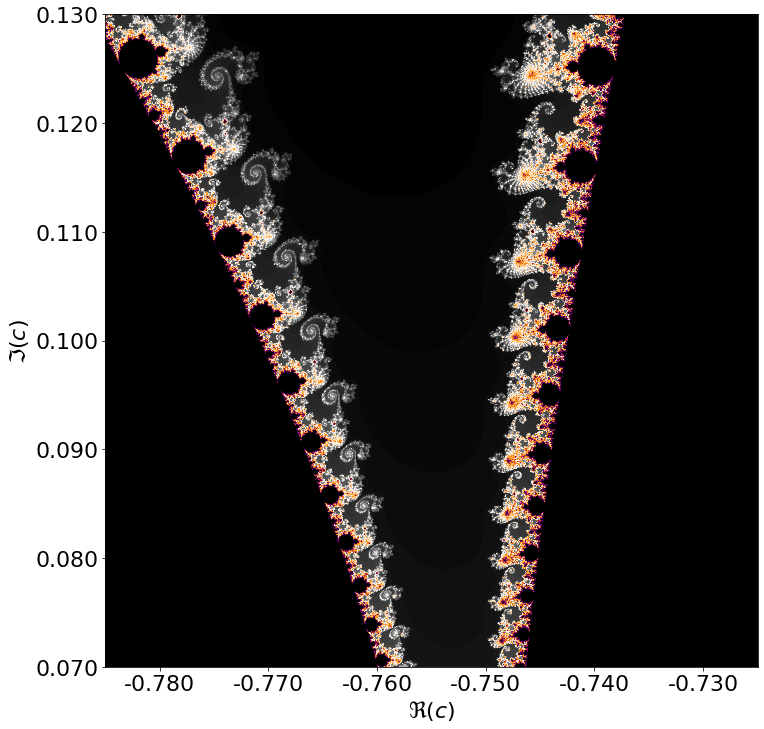

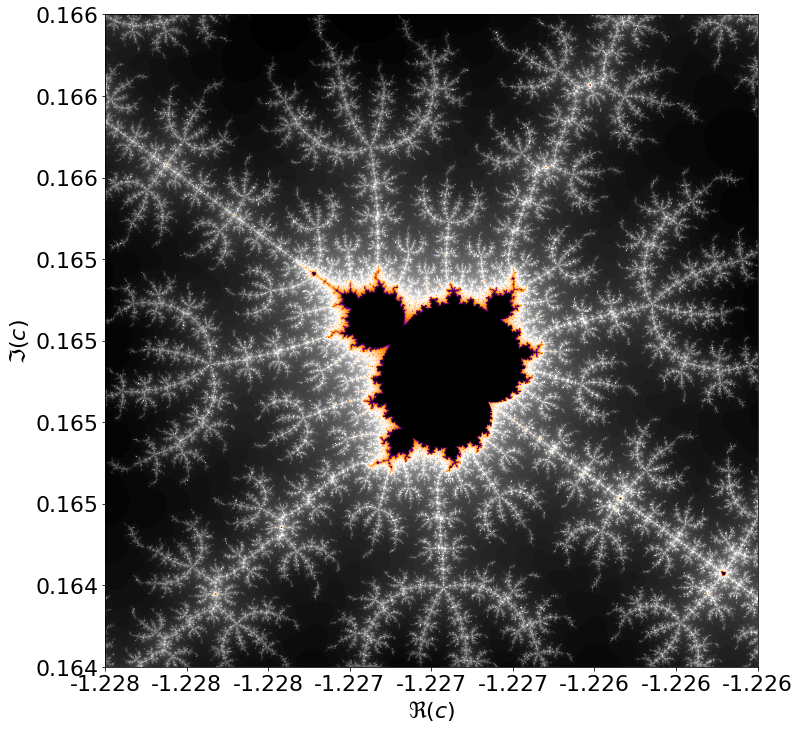

In [13]:
# seahorse valley
cur_center = -0.755 + 0.1j
cur_extent = .06 + .06j
gm.draw_mandelbrot(cur_center, cur_extent,fname="outline_mb",resolution=256*2**2)
#
# a small bit
cur_center = -1.227 + 0.165j
cur_extent = .002 + .002j
gm.draw_mandelbrot(cur_center, cur_extent,fname="small_mb",resolution=256*2*2)

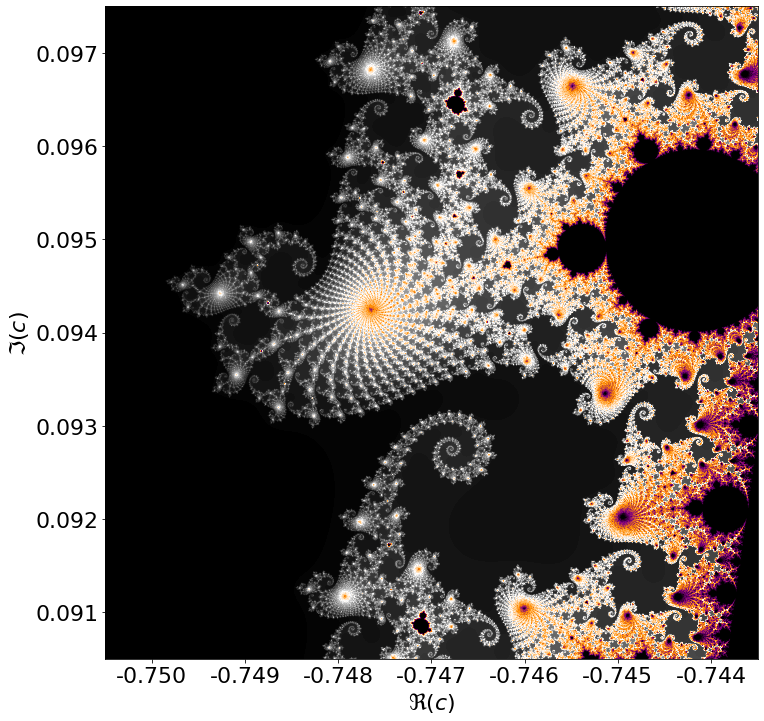

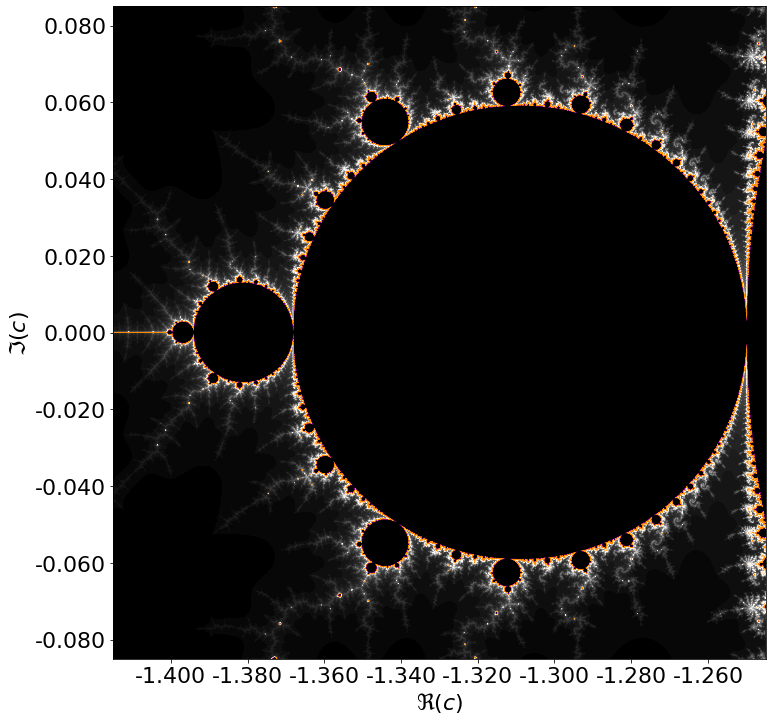

In [14]:
# nautilus
cur_center =  -.747 + 0.094j
cur_extent = .007 + .007j
gm.draw_mandelbrot(cur_center=cur_center, cur_extent=cur_extent,fname="nautilus_mb",resolution=256*2**3,color_list=["black","white","darkorange","purple","black"])


# self-similarity
cur_center =  -1.33 + 0j
cur_extent = .17 + .17j
gm.draw_mandelbrot(cur_center=cur_center, cur_extent=cur_extent,fname="self_similar_mb",resolution=256*2**3,color_list=["black","white","darkorange","darkorange","darkorange","darkorange","purple","black"])

## Convergence of no. iterations

In [7]:
## Add plot

## Sampling methods

In [8]:
## Show sampling methods

## Convergence of the Area

In [9]:
## Add plots of convergence 

## Improving the convergence